In [83]:
import numpy as np
import os
print(os.getcwd())
filenames=[
    "data/bw_filter_4.npy",
    "data/bw_filter_5.npy",
    "data/bw_filter_6.npy",
    "data/bw_filter_7.npy",
    "data/bw_filter_8.npy",
    "data/bw_filter_9.npy",
    "data/bw_filter_10.npy",
    "data/bw_filter_11.npy",
    #"data/bw_filter_12.npy", # looks a little weird?
    "data/bw_filter_13.npy",
    "data/bw_filter_14.npy",
    "data/bw_filter_15.npy",
    "data/bw_filter_16.npy",
    "data/bw_filter_17.npy",
    "data/bw_filter_18.npy",
    "data/bw_filter_19.npy",
    "data/bw_filter_20.npy",
    "data/bw_filter_21.npy",
    "data/bw_filter_22.npy",
    "data/bw_filter_23.npy",
    "data/bw_filter_24.npy",
    #"data/bw_filter_25.npy", # looks very weird
    "data/bw_filter_26.npy",
    "data/bw_filter_27.npy",
    "data/bw_filter_28.npy",
    "data/bw_filter_29.npy",
    "data/bw_filter_30.npy",
    "data/bw_filter_31.npy",
    "data/bw_filter_32.npy",
    "data/bw_filter_33.npy",
    "data/bw_filter_34.npy",
    "data/bw_filter_35.npy",
]

root_dir="/Users/miskodzamba/Dropbox/research/gits/spf/software/data"
filenames=sorted(filter(lambda x : '.npy' in x ,[ "%s/%s" % (root_dir,x) for x in  os.listdir(root_dir)]))
filenames.remove(  "%s/bw_filter_25.npy" % root_dir)  
filenames.remove(  "%s/bw_filter_12.npy" % root_dir)  

cols=[
    'time',
    'xy[0]',
    'xy[1]',
    'mean',
    'mean_trimmed',
]

/Users/miskodzamba/Dropbox/research/gits/spf/software


In [84]:
x_min,x_max

(-0.006396181, 2580.009)

In [85]:
y_min,y_max

(-0.020767894, 2500.0046)

In [99]:
def coord_to_bin(x,y,bin_size=5):
    return int(x//bin_size),int(y//bin_size)

x_min,x_max=None,None
y_min,y_max=None,None

for filename in filenames:
    m = np.memmap(filename, dtype='float32', mode='r', shape=(400000,70))
    _x_min,_x_max=m[:,1].min(),m[:,1].max()
    _y_min,_y_max=m[:,2].min(),m[:,2].max()
    if x_min is None:
        x_min=_x_min
        x_max=_x_max
        y_min=_y_min
        y_max=_y_max
    else:
        x_min=min(x_min,_x_min)
        x_max=max(x_max,_x_max)
        y_min=min(y_min,_y_min)
        y_max=max(y_max,_y_max)

bin_size=5
max_x,max_y=coord_to_bin(x_max,y_max,bin_size=bin_size)

means=np.zeros((int(max_x+1),int(max_y+1)))
counts=np.zeros((int(max_x+1),int(max_y+1)))
std=np.zeros((int(max_x+1),int(max_y+1)))

for filename in filenames:
    m = np.memmap(filename, dtype='float32', mode='r', shape=(400000,70))
    
    for row in m:
        x,y,mean,_mean=row[1:5]
        _x,_y=coord_to_bin(x,y,bin_size=bin_size)
        means[_x,_y]+=_mean
        counts[_x,_y]+=1

means/=counts

for filename in filenames:
    m = np.memmap(filename, dtype='float32', mode='r', shape=(400000,70))
    
    for row in m:
        x,y,mean,_mean=row[1:5]
        _x,_y=coord_to_bin(x,y,bin_size=bin_size)
        std[_x,_y]+=np.power(means[_x,_y]-_mean,2)
        #if _x==82 and _y==49:
        #    print(mean,means[_x,_y],np.power(means[_x,_y]-_mean,2),)
std/=counts

/var/folders/31/j84vsqkx1rg7zggf_0glkq8m0000gn/T/ipykernel_16716/2593669397.py:38: RuntimeWarning: invalid value encountered in divide
  means/=counts
/var/folders/31/j84vsqkx1rg7zggf_0glkq8m0000gn/T/ipykernel_16716/2593669397.py:49: RuntimeWarning: invalid value encountered in divide
  std/=counts


In [100]:
print(means.shape),means.shape[0]*means.shape[1]

(517, 501)


(None, 259017)

In [101]:
std

array([[2.36627480e-06, 2.59244740e+00, 2.30614703e-02, ...,
                   nan,            nan, 8.43988282e-06],
       [8.71693379e-04, 8.53597741e+00, 7.42735436e+00, ...,
                   nan,            nan,            nan],
       [8.69072063e+00, 1.51533865e-02, 7.98942902e+00, ...,
                   nan,            nan,            nan],
       ...,
       [5.06998026e-03, 1.73709545e-05, 3.04151291e-04, ...,
        1.15929416e-03, 2.48958178e-03,            nan],
       [8.54893927e-06, 6.57700421e-05, 2.96930946e-04, ...,
        1.40295325e-03, 2.27570896e-03,            nan],
       [           nan, 0.00000000e+00, 4.75228954e+00, ...,
        3.30291191e-06,            nan,            nan]])

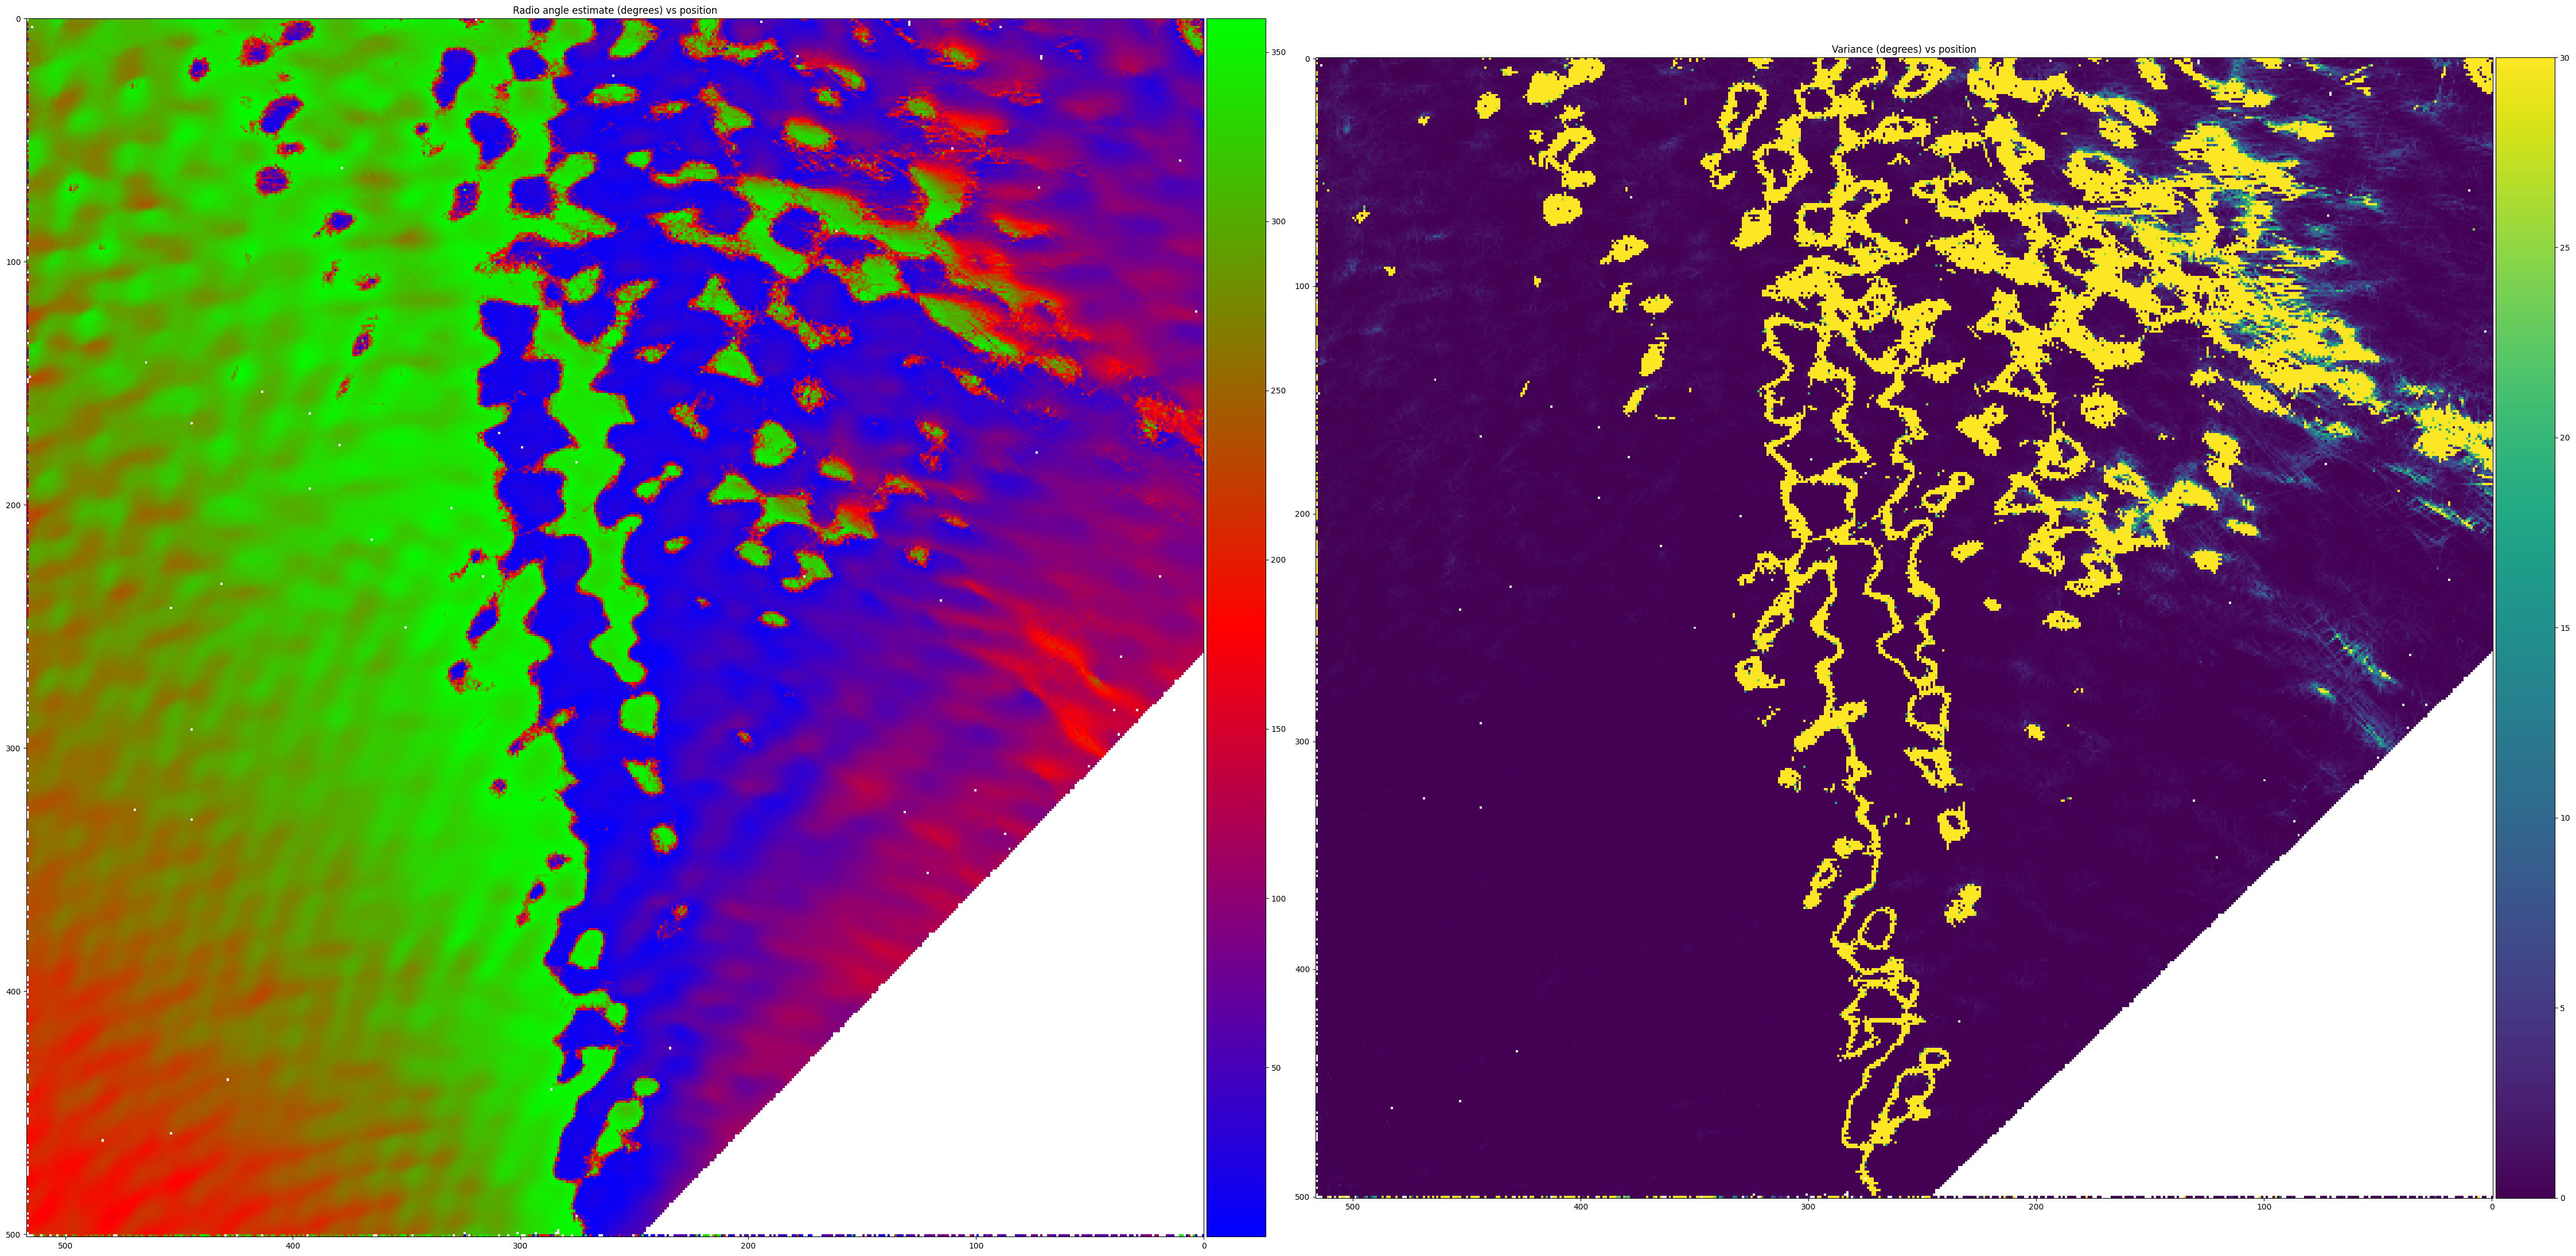

In [102]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,2,figsize=(45,22))

im=axs[0].imshow(means.T*360/(2*np.pi),origin='upper',extent=(0,means.shape[0],means.shape[1],0),cmap='brg',aspect='auto')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
axs[0].invert_xaxis()

im=axs[1].imshow(np.clip(std.T*360/(2*np.pi),a_max=30,a_min=0),
                 #origin='upper',
                 #extent=(
                 #    0,
                 #    means.shape[0],
                 #    means.shape[1],
                 #    0),
                 #cmap='brg',aspect='auto'
                )
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
axs[1].invert_xaxis()

steps=7
xs=np.arange(0,means.shape[0],means.shape[0]//steps)
ys=np.arange(0,means.shape[1],means.shape[1]//steps)

for idx in [0,1]:
    #axs[idx].set_xticks(xs,xs*bin_size/10)
    #axs[idx].set_yticks(ys,ys*bin_size/10)
    #
    #axs[idx].set_xlabel("X position (cm)")
    #axs[idx].set_ylabel("Y position (cm)")
    pass
    
axs[0].set_title("Radio angle estimate (degrees) vs position")
axs[1].set_title("Variance (degrees) vs position")
plt.tight_layout()
plt.savefig('1cm2_res_map.png')

(array([7.18073e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  58020.8, 116041.6, 174062.4, 232083.2, 290104. ,
        348124.8, 406145.6, 464166.4, 522187.2, 580208. ]),
 <BarContainer object of 10 artists>)

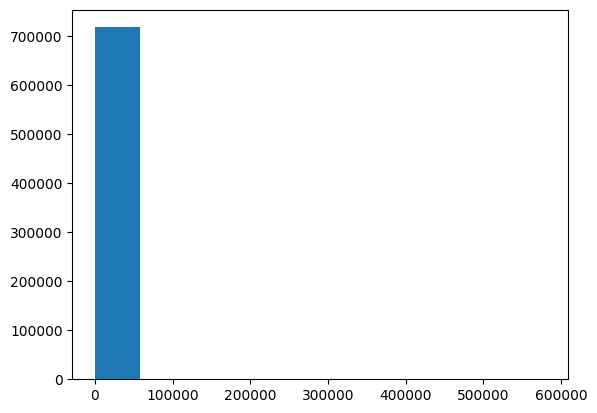

In [98]:
import matplotlib.pyplot as plt
plt.hist(counts.reshape(-1))

In [91]:
m = np.memmap("data/bw_filter_29.npy", dtype='float32', mode='r', shape=(400000,70))
#m[0] # time, xy[0], xy[1], phase_diff, _phase_diff, beam_sds

In [92]:
m

memmap([[ 2.8483868e-03, -2.5485279e-03,  1.1163779e+03, ...,
          5.8279785e+02,  7.2063043e+02,  8.4456390e+02],
        [ 3.0452013e-02,  0.0000000e+00,  1.1163779e+03, ...,
          5.8248523e+02,  7.2017542e+02,  8.4400433e+02],
        [ 1.6084959e+01,  1.9917152e+00,  1.1269514e+03, ...,
          5.8284589e+02,  7.2065533e+02,  8.4459662e+02],
        ...,
        [ 9.3538643e+03,  1.3987325e+03,  1.0279905e+02, ...,
          6.6432336e+02,  6.9259119e+02,  7.0502863e+02],
        [ 9.3538828e+03,  1.3987325e+03,  1.0279905e+02, ...,
          6.6407404e+02,  6.9240820e+02,  7.0490601e+02],
        [ 9.3539033e+03,  1.3981527e+03,  1.0291298e+02, ...,
          6.6564850e+02,  6.9416431e+02,  7.0681226e+02]], dtype=float32)

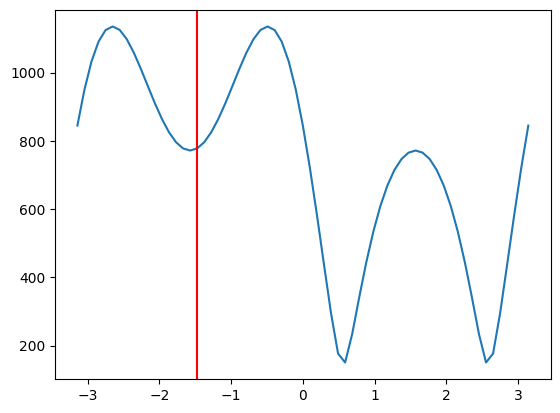

In [93]:
idx=-6000+6000
sds=m[idx][5:]
angle=-((m[idx][3]+np.pi)%(2*np.pi)-np.pi)
plt.plot(np.linspace(-np.pi,np.pi,len(sds)),sds)
plt.axvline(x=angle,color='red')
#m[idx]

In [105]:
np.arctan2(-1,0)

-1.5707963267948966